<a href="https://colab.research.google.com/github/ShumengJ/ECEGY6143-ML-Archive/blob/main/3_deep_dive_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# for 3d interactive plots
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d


%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data generated by a linear function



In [ ]:
def generate_linear_regression_data(n=100, d=1, coef=[5], intercept=1, sigma=0):
  x = np.random.randn(n,d)
  y = (np.dot(x, coef) + intercept).squeeze() + sigma * np.random.randn(n)
  return x, y

## Gradient descent for simple linear regression


### Generate data

In [ ]:
w_true = np.array([2, 3])
# y = 2 + 3x

In [ ]:
intercept = w_true[0]
coef = w_true[1:]
print(intercept, coef)

2 [3]


In [ ]:
n_samples = 100

In [ ]:
x, y = generate_linear_regression_data(n=n_samples, d=1, coef=coef, intercept=intercept)

In [ ]:
x.shape

(100, 1)

In [ ]:
y.shape

(100,)

In [ ]:
X = np.hstack((np.ones((n_samples, 1)), x))
X.shape

(100, 2)

In [ ]:
print(X[:5])

[[ 1.         -0.89608897]
 [ 1.         -0.65810501]
 [ 1.          0.17451868]
 [ 1.         -0.47250946]
 [ 1.          0.14668261]]


### Define a descent step

In each gradient descent step, we will compute

\begin{aligned}
w_{k+1} &= w_k + \alpha_k X^T (y - X w_k) \\
&= w_k + \alpha_k \sum_{i=1}^n (y_k - \langle w_k,x_i \rangle) x_i.
\end{aligned}

In [ ]:
def gd_step(w, X, y, lr):
  # use current parameters to get y_hat
  y_hat = np.dot(X,w)
  # compute gradient for this y_hat
  grad = np.matmul(X.T, y_hat-y)
  # update weights
  w_new = w - lr*grad

  # we don't have to actually compute MSE
  # but I want to, for visualization
  mse = 1.0/len(y)*np.sum(y_hat - y)**2

  return (w_new, mse, grad)


### Perform gradient descent

In [ ]:
itr = 50
lr = 0.001
w_init = np.random.randn(len(w_true))
print(w_init)

[-0.17376411  2.79838878]


In [ ]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient

In [ ]:
print(w_star)

[1.98647842 2.99374018]


### Visualize

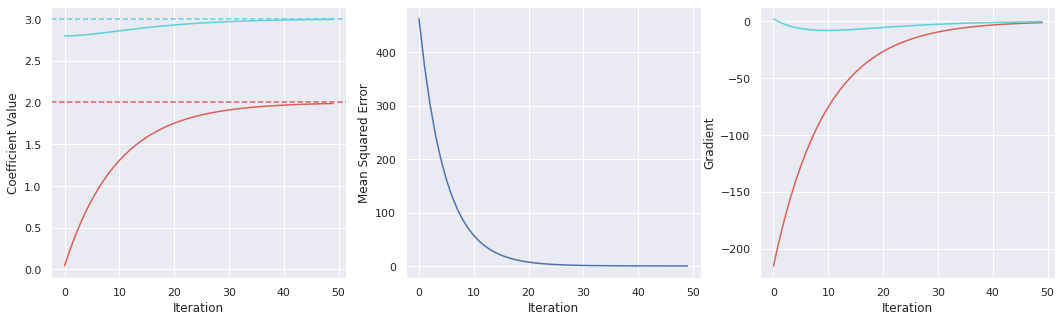

In [ ]:
colors = sns.color_palette("hls", len(w_true))

plt.figure(figsize=(18,5))

plt.subplot(1,3,1);

for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(np.arange(itr), w_steps[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

plt.subplot(1,3, 2);
sns.lineplot(np.arange(itr), mse_steps);
#plt.yscale("log")
plt.xlabel("Iteration");
plt.ylabel("Mean Squared Error");


plt.subplot(1, 3, 3);
for n in range(len(coef)+1):
  sns.lineplot(np.arange(itr), grad_steps[:,n], color=colors[n]);
plt.xlabel("Iteration");
plt.ylabel("Gradient");


### Other things to try

* What happens if we increase the learning rate?
* What happens if we decrease the learning rate?

## Descent path

### Generate data

We will revisit our multiple linear regression.

In [ ]:
w_true = [2, 6, 5]
intercept = w_true[0]
coef = w_true[1:]
print(intercept, coef)

2 [6, 5]


In [ ]:
n_samples = 100

In [ ]:
x, y = generate_linear_regression_data(n=n_samples, d=2, coef=coef, intercept=intercept)

### MSE contour

In [ ]:
coefs = np.arange(2, 8, 0.05)
mses_coefs = np.zeros((len(coefs), len(coefs)))

for idx_1, c_1 in enumerate(coefs):
  for idx_2, c_2 in enumerate(coefs):
    y_coef = (intercept + np.dot(x,[c_1, c_2])).squeeze()
    mses_coefs[idx_1,idx_2] =  1.0/(len(y_coef)) * np.sum((y - y_coef)**2)

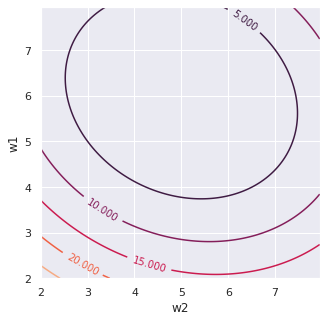

In [ ]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs)
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');

### Perform gradient descent

In [ ]:
X = np.hstack((np.ones((n_samples, 1)), x))
X.shape

(100, 3)

In [ ]:
itr = 50
lr = 0.001
w_init = [intercept, 2, 8]

In [ ]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient

### Visualize


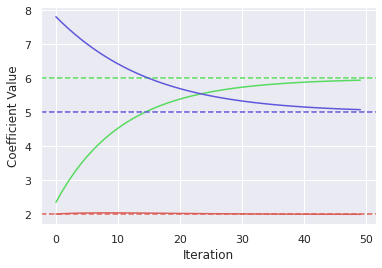

In [ ]:
colors = sns.color_palette("hls", len(w_true))

for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(np.arange(itr), w_steps[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");


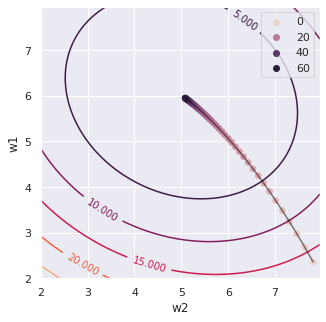

In [ ]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps[:,2], w_steps[:,1], color='black', alpha=0.5);
sns.scatterplot(w_steps[:,2], w_steps[:,1], hue=np.arange(itr), edgecolor=None);

In [ ]:
w_star

array([2.00331055, 5.94553007, 5.07949622])

### Other things to try

* What happens if we generate noisy data?

## Stochastic gradient descent

### Define a descent step

In [ ]:
def sgd_step(w, X, y, lr, n):

  idx_sample = np.random.choice(X.shape[0], n, replace=True)

  X_sample = X[idx_sample, :]
  y_sample = y[idx_sample]

  # use current parameters to get y_hat
  y_hat = np.dot(X_sample,w)
  # compute gradient for this y_hat
  grad = np.matmul(X_sample.T, y_hat-y_sample)
  # update weights
  w_new = w - lr*grad

  return w_new


### Perform gradient descent

In [ ]:
itr = 50
lr = 0.001
n = 1
w_init = [intercept, 2, 8]

In [ ]:
w_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star = sgd_step(w_star, X, y, lr, n)
  w_steps[i] = w_star


In [ ]:
w_star

array([1.94540406, 2.14915183, 7.87434179])

### Visualize


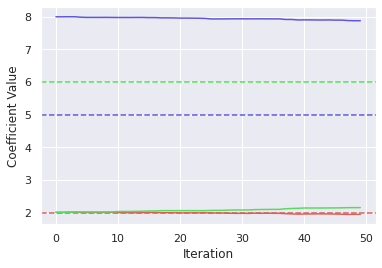

In [ ]:
colors = sns.color_palette("hls", len(coef) + 1)

plt.axhline(y=intercept, linestyle='--', color=colors[0]);
sns.lineplot(np.arange(itr), w_steps[:,0], color=colors[0]);

for n in range(len(coef)):
  plt.axhline(y=coef[n], linestyle='--', color=colors[n+1]);
  sns.lineplot(np.arange(itr), w_steps[:,n+1], color=colors[n+1]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");


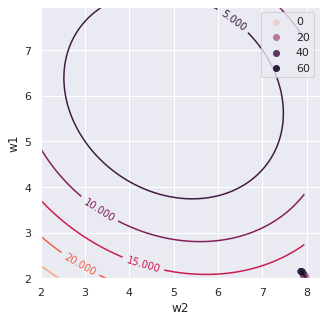

In [ ]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps[:,2], w_steps[:,1], color='black', alpha=0.5);
sns.scatterplot(w_steps[:,2], w_steps[:,1], hue=np.arange(itr), edgecolor=None);


### Other things to try

* Increase learning rate?
* Decrease learning rate?
* Use decaying learning rate $\alpha_k = C/k $?
* Increase number of samples used in each iteration?
